In [1]:
from Data_loader import dummy_enc
from Data_imputation import knn_imputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from FeatureSelection import PCA_data, Kernal_PCA, TrSVD
from decision_tree_Classifiers import dt_kn_classifier_pca, dt_kn_classifier_pca_kfold, dt_kn_classifier_pca_stratfold
from GridSearch_params import split_data

In [2]:
X_data = pd.read_csv("mushroom_trn_data.csv")
X_data_labels = pd.read_csv("mushroom_trn_class_labels.csv", header = None)
y = X_data_labels.drop(0, axis = 1)

In [3]:
sscaler = StandardScaler()
X_data_enc = dummy_enc(X_data)
x_data_mean = X_data_enc
X_data_sc = sscaler.fit_transform(x_data_mean)

In [4]:
x_data_pca = PCA_data(X_data_sc)

In [5]:
x_tr, x_te, y_tr, y_te = split_data(x_data_pca, y)

Decision Tree Classifier without using any Cross-Validation Technique and PCA Feature Selection
Classification Report
              precision    recall  f1-score   support

           e       0.97      0.97      0.97       747
           p       0.97      0.97      0.97       716

    accuracy                           0.97      1463
   macro avg       0.97      0.97      0.97      1463
weighted avg       0.97      0.97      0.97      1463

Plotting the Confusion Matrix


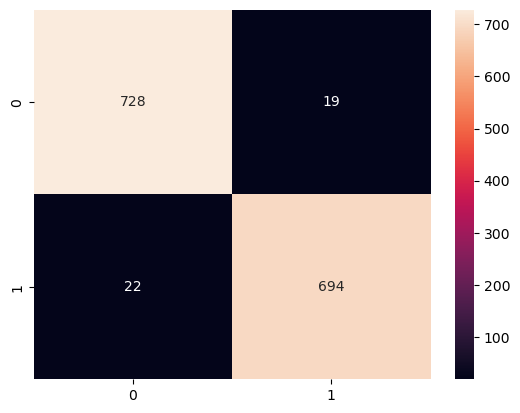

In [6]:
dt_kn_classifier_pca(x_tr, x_te, y_tr, y_te)

Decision Tree Classifier with K-Fold Cross-Validation Technique(K = 10) and PCA Feature Extraction
Classification Report
	Precision Score(Macro): 0.97
	Precision Score(Weighted): 0.97

	Recall Score(Macro): 0.97
	Recall Score(Weighted): 0.97

	F1 Score(Macro): 0.97
	F1 Score(Weighted): 0.97
	Accuracy Score: 0.97
Plotting the Confusion Matrix


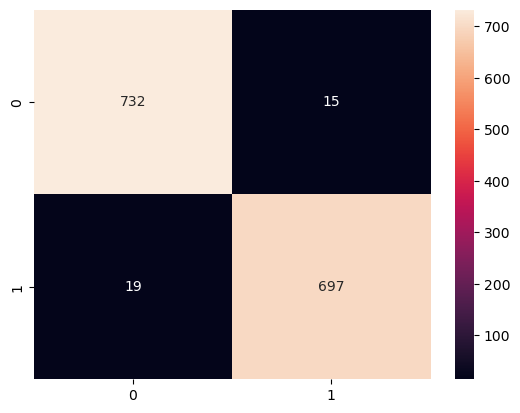

In [7]:
dt_kn_classifier_pca_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

Decision Tree Classifier with Stratified K-Fold Cross-Validation Technique and PCA Feature Extraction Technique
Classification Report
	Precision Score(Macro): 0.97
	Precision Score(Weighted): 0.97

	Recall Score(Macro): 0.97
	Recall Score(Weighted): 0.97

	F1 Score(Macro): 0.97
	F1 Score(Weighted): 0.97
	Accuracy Score: 0.97
Plotting the Confusion Matrix


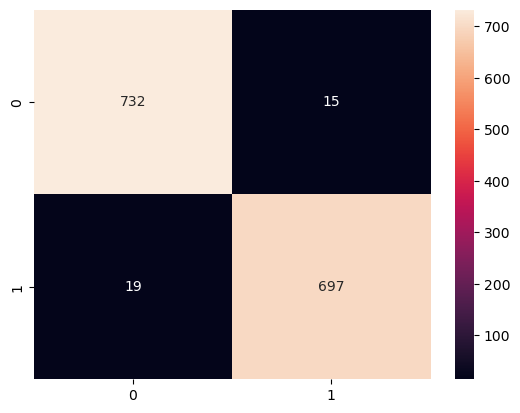

In [8]:
dt_kn_classifier_pca_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

In [9]:
from random_forest_classifier import rft_kn_classifier_pca, rft_kn_classifier_pca_kfold, rft_kn_classifier_pca_stratfold

Random Forest Tree Classifier without using any Cross-Validation Technique and PCA Feature Selection


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       747
           p       1.00      1.00      1.00       716

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463

Plotting the Confusion Matrix


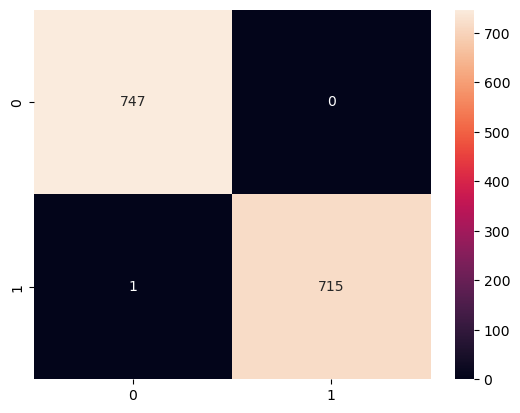

In [10]:
rft_kn_classifier_pca(x_tr, x_te, y_tr, y_te)

In [ ]:
rft_kn_classifier_pca_kfold(x_data_pca,y,  x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with K-Fold Cross-Validation Technique(K = 10) and PCA Feature Extraction


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [ ]:
rft_kn_classifier_pca_stratfold(x_data_pca, y,x_tr, x_te, y_tr, y_te )

In [ ]:
from logistic_regression_classifier import lr_kn_classifier_pca, lr_kn_classifier_pca_kfold, lr_kn_classifier_pca_stratfold

In [ ]:
lr_kn_classifier_pca(x_tr, x_te, y_tr, y_te)

In [ ]:
lr_kn_classifier_pca_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

In [ ]:
lr_kn_classifier_pca_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

In [ ]:
y_enc = dummy_enc(y)

In [ ]:
from XGBoost_classifier import xgb_kn_classifier_pca, xgb_kn_classifier_pca_kfold, xgb_kn_classifier_pca_stratfold

In [ ]:
xgb_kn_classifier_pca(x_tr, x_te, y_tr, y_te)

In [ ]:
xgb_kn_classifier_pca_kfold(x_data_pca, y_enc, x_tr, x_te, y_tr, y_te)

In [ ]:
xgb_kn_classifier_pca_stratfold(x_data_pca, y_enc, x_tr, x_te, y_tr, y_te)